<a href="https://colab.research.google.com/github/xiaoyinw/xiaoyinwUSC/blob/main/Homework5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#from google.colab import drive
#!mkdir drive
#drive.mount('./drive')
#!cd /content/drive/MyDrive/DSCI552/Homework5/notebook

Mounted at ./drive


In [8]:
#cd /content/drive/MyDrive/DSCI552/Homework5/notebook

/content/drive/MyDrive/DSCI552/Homework5/notebook


# Part 1

###**Problem a**

import the original data

In [9]:
data = pd.read_csv('../data/Frogs_MFCCs.csv')

In [10]:
data

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,MFCCs_11,MFCCs_12,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,0.188654,-0.075622,-0.156436,0.082245,0.135752,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,0.270958,-0.095004,-0.254341,0.022786,0.163320,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,0.266064,-0.072827,-0.237384,0.050791,0.207338,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,0.267279,-0.162258,-0.317084,-0.011567,0.100413,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,0.332695,-0.100749,-0.298524,0.037439,0.219153,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,0.065905,-0.000717,-0.145668,-0.059364,0.024206,-0.000861,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber,60
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,0.038545,0.000856,-0.164675,-0.105600,0.030767,0.006457,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber,60
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,0.062748,0.011868,-0.150025,-0.078615,0.024861,0.008696,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber,60
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,0.049792,-0.003997,-0.153120,-0.075320,0.022903,0.001924,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber,60


factorize the corresponding label from string to integer

In [11]:
data['Family'] = pd.factorize(data['Family'])[0]

In [12]:
data['Genus'] = pd.factorize(data['Genus'])[0]

In [13]:
data['Species'] = pd.factorize(data['Species'])[0]

In [14]:
from sklearn.model_selection import train_test_split

split the original data into train and test dataset randomly, which are 70% and 30% of total data

In [15]:
train, test = train_test_split(data, test_size=0.3, shuffle=True)

### **Problem b**

##### Problem bi

Difference between multi-class classification & multi-label classification is that in multi-class problems he classes are mutually exclusive, whereas for multi-label problems each label represents a different classification task, but the tasks are somehow related.

Hamming-Loss
In simplest of terms, Hamming-Loss is the fraction of labels that are incorrectly predicted that is the fraction of the wrong labels to the total number of labels

Exact Match Ratio is the most strict metric, indicating the percentage of samples that have all their labels classified correctly.

Problem bii

In [16]:
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

In [17]:
train_x = train.iloc[:,:-4]
train_y = train.iloc[:,-4:]
test_x = test.iloc[:,:-4]
test_y = test.iloc[:,:-4]

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

In [19]:
result = {}

based on the former experiment, I have limited the parameters about the weight of the SVM penalty and the width of the Gaussian Kernel in to a certain range based on the accuracy more than 70%.
below I used ten-fold cross validation to determine the parameters that are best suitable using the train dataset and validation dataset

In [20]:
def parametersSearch(train_y):
    svc = SVC(kernel='rbf', max_iter=500)
    c_parameters = np.logspace(0, 5, num=6, base=10)
    gamma_parameters = np.linspace(1,5,5)
    parameters = {'C': c_parameters, 'gamma':gamma_parameters}
    clf = GridSearchCV(svc, parameters, cv=10)
    clf.fit(train_x,train_y)
    print(clf.cv_results_)
    print('the best parameter pair is '+ str(clf.best_params_))
    test_pred = clf.predict(test_x)
    return test_pred

build the function to calculate the hamming loss for prediction and groudtruth

In [21]:
def hamming_loss_calc(pred, truth):
  classification_error = 0
  for i in range(0,3):
    for p, t in zip(pred[i], truth[i]):
      if p != t:
        classification_error += 1
  hamming_loss = np.round(classification_error / (pred.shape[0] * pred.shape[1]),4)
  print('The hamming_loss is '+ str(hamming_loss))
  return hamming_loss

build the function to calculate the exact match ratio for prediction and groundtruth

In [22]:
def exact_match_ratio_calc(pred, truth):
  classification_error = 0
  for i in range(pred.shape[1]):
    family_pred = pred[0][i]
    genus_pred = pred[1][i]
    species_pred = pred[2][i]
    
    family_truth = truth[0][i]
    genus_truth = truth[1][i]
    species_truth = truth[2][i]
    if(family_pred == family_truth and genus_pred == genus_truth and species_pred == species_truth):
      continue
    classification_error += 1
    exact_match_ratio = np.round(1 - classification_error / pred.shape[1] , 4)
  print('exact match ratio is ' + str(exact_match_ratio))
  return exact_match_ratio

In [23]:
family_pred = parametersSearch(train_y['Family'])

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base

{'mean_fit_time': array([0.18091731, 0.1629313 , 0.17726374, 0.20807681, 0.24559872,
       0.11620839, 0.12501626, 0.15842271, 0.19717116, 0.23639963,
       0.11052527, 0.12144098, 0.15897527, 0.19838009, 0.23557234,
       0.10893655, 0.12226269, 0.16178312, 0.20068314, 0.22757778,
       0.10387561, 0.11314197, 0.14989715, 0.18327157, 0.22533264,
       0.10629129, 0.11756804, 0.15493283, 0.18814988, 0.22877202]), 'std_fit_time': array([0.0043832 , 0.00636652, 0.00716335, 0.00552468, 0.00605386,
       0.00424289, 0.0040503 , 0.00738293, 0.00650082, 0.00367467,
       0.00538303, 0.00595586, 0.00354141, 0.00565873, 0.00542515,
       0.00393048, 0.00248871, 0.00925211, 0.00588889, 0.00687759,
       0.00420932, 0.0024795 , 0.00511393, 0.00437048, 0.00512978,
       0.00259778, 0.00225388, 0.00418704, 0.0077098 , 0.00364319]), 'mean_score_time': array([0.02100265, 0.01659009, 0.01605532, 0.01647601, 0.01878414,
       0.01065049, 0.01194174, 0.01337535, 0.01774964, 0.01922808,
     

In [24]:
family_pred.shape

(2159,)

In [25]:
genus_pred = parametersSearch(train_y['Genus'])

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base

{'mean_fit_time': array([0.19203906, 0.20629313, 0.24797933, 0.30200956, 0.3657239 ,
       0.14212568, 0.1867902 , 0.23922353, 0.29589729, 0.3633286 ,
       0.13673124, 0.18378837, 0.24255981, 0.29995637, 0.3589438 ,
       0.13407166, 0.18118243, 0.23927722, 0.29323161, 0.36038823,
       0.13639917, 0.18583207, 0.23879552, 0.30750666, 0.35790684,
       0.13742757, 0.18107877, 0.23876143, 0.30238013, 0.35646932]), 'std_fit_time': array([0.00397356, 0.00510529, 0.00954835, 0.00797769, 0.00771826,
       0.00636707, 0.00636745, 0.00511892, 0.0052937 , 0.01096032,
       0.00453489, 0.00873651, 0.00574487, 0.00553592, 0.00859641,
       0.00558243, 0.00543315, 0.00534541, 0.00629655, 0.00845462,
       0.00474724, 0.0108415 , 0.00576306, 0.00776354, 0.00873608,
       0.00630085, 0.0069644 , 0.0075014 , 0.00683134, 0.00482596]), 'mean_score_time': array([0.0235502 , 0.02094452, 0.02122767, 0.02166138, 0.02465169,
       0.01571202, 0.01868865, 0.0191236 , 0.02126446, 0.02310042,
     

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [26]:
genus_pred.shape

(2159,)

In [27]:
species_pred = parametersSearch(train_y['Species'])

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base

{'mean_fit_time': array([0.15714765, 0.19599373, 0.24289877, 0.29757264, 0.34485781,
       0.11968734, 0.17757838, 0.22876966, 0.28057323, 0.34265389,
       0.12120872, 0.17830985, 0.22773893, 0.28733208, 0.34220827,
       0.11992109, 0.17170942, 0.22848234, 0.28400447, 0.34123094,
       0.11925399, 0.17677431, 0.22969308, 0.28255992, 0.33965256,
       0.12204211, 0.17436194, 0.22592039, 0.28488429, 0.33484938]), 'std_fit_time': array([0.00536973, 0.00352511, 0.00558772, 0.00825608, 0.00847979,
       0.0040385 , 0.00611218, 0.00863275, 0.00427663, 0.00967129,
       0.00342874, 0.00563125, 0.00375017, 0.00702869, 0.00715213,
       0.00608674, 0.00386341, 0.00464389, 0.00491093, 0.01271472,
       0.00473647, 0.00681462, 0.00574812, 0.00970503, 0.00882704,
       0.00289449, 0.00559486, 0.0057891 , 0.0079044 , 0.00903019]), 'mean_score_time': array([0.02599385, 0.02358432, 0.02351637, 0.02392716, 0.02457964,
       0.01770706, 0.02031624, 0.02070215, 0.02183456, 0.02408495,
     

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


calculate the corresponding evaluation results based on the labels

In [28]:
pred = [family_pred,genus_pred,species_pred]
pred = np.array(pred)

In [29]:
family_truth = np.array(test['Family'])
genus_truth = np.array(test['Genus'])
species_truth = np.array(test['Species'])
truth = [family_truth, genus_truth, species_truth]
truth = np.array(truth)

In [30]:
hamming_loss = hamming_loss_calc(pred, truth)

The hamming_loss is 0.0065


In [31]:
exact_match_ratio = exact_match_ratio_calc(pred, truth)

exact match ratio is 0.9903


In [32]:
result['gaussian'] = [hamming_loss, exact_match_ratio]

Problem biii

standardlize the original data and use l1-penalized SVM to train and test the data

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()
std_train_x = scaler.fit_transform(train_x)
std_test_x = scaler.fit_transform(test_x)

In [35]:
def l1PenaltyParametersSearch(train_y):
    linearsvc = LinearSVC(penalty='l1', verbose=1,dual=False, max_iter=500)
    c_parameters = np.logspace(0, 5, num=6, base=10)
    parameters = {'C': c_parameters}
    clf = GridSearchCV(linearsvc, parameters, cv=10, scoring='f1_weighted')
    clf.fit(std_train_x,train_y)
    print(clf.cv_results_)
    print('the best parameter pair is '+ str(clf.best_params_))
    test_pred = clf.predict(std_test_x)
    return test_pred

In [36]:
std_family_pred = l1PenaltyParametersSearch(train_y['Family'])

[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear][LibLinear]{'mean_fit_time': array([2.05981848, 2.11628649, 2.11121194, 2.09547641, 2.09651382,
       2.09868336]), 'std_fit_time': array([0.10212625, 0.11241264, 0.09485053, 0.07414978, 0.09949867,
       0.09787351]), 'mean_score_time': array([0.00308244, 0.00302274, 0.00248311, 0.00264165, 0.00258496,
       0.00263784]), 'std_score_time': array([0.00126337, 0.00059956, 0.00041421, 0.00048837, 0.00047479,
       0.00045245]), 'param_C': masked_array(data=[1.0, 10.0, 100.0, 1000.0, 10000.0, 100000.0],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 1.0}, {'C': 10.0}, {'C': 100.0}, {'C': 1000.0}, {'C': 10000.0}, {'C': 100000.0}], 'split0_test_score': array([0.90776642, 0.90776642, 0.90776642, 0.90776642, 0.90776642,
       0.90776642]), 'split1_test_score': array([0.93248304, 0.93619953, 0.93619953, 0.93619953, 0.93619953,
       0.93619953]), 'split2_test_score': array([0.92177734, 0.92177734

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [37]:
std_genus_pred = l1PenaltyParametersSearch(train_y['Genus'])

[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]{'mean_fit_time': array([3.20085933, 3.36811862, 3.33603504, 3.37959397, 3.34573069,
       3.36537714]), 'std_fit_time': array([0.20108307, 0.0864254 , 0.06043342, 0.03361266, 0.06445102,
       0.06356333]), 'mean_score_time': array([0.00282204, 0.00285244, 0.00247402, 0.00298755, 0.00306747,
       0.00297291]), 'std_score_time': array([0.00053883, 0.0005815 , 0.00052126, 0.00035555, 0.00018991,
       0.00038524]), 'param_C': masked_array(data=[1.0, 10.0, 100.0, 1000.0, 10000.0, 100000.0],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 1.0}, {'C': 10.0}, {'C': 100.0}, {'C': 1000.0}, {'C': 10000.0}, {'C': 100000.0}], 'split0_test_score': array([0.93070332, 0.9329573 , 0.9329573 , 0.9329573 , 0.9329573 ,
       0.9329573 ]), 'split1_test_score': array([0.93479402, 0.93277207, 0.93277207, 0.93277207, 0.93277207,
       0.93277207]), 'split2_test_score': array([0.95432774, 0.95432774, 0.9543277

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [38]:
std_species_pred = l1PenaltyParametersSearch(train_y['Species'])

[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibLinear]{'mean_fit_time': array([3.13943529, 3.24408779, 3.26579032, 3.2291616 , 3.25682285,
       3.29701037]), 'std_fit_time': array([0.15834366, 0.06434104, 0.03549333, 0.05071002, 0.04242665,
       0.1052654 ]), 'mean_score_time': array([0.00278685, 0.00298789, 0.00301352, 0.00305223, 0.00283144,
       0.00279863]), 'std_score_time': array([0.00037932, 0.00024315, 0.00019624, 0.00056905, 0.00037664,
       0.0004604 ]), 'param_C': masked_array(data=[1.0, 10.0, 100.0, 1000.0, 10000.0, 100000.0],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 1.0}, {'C': 10.0}, {'C': 100.0}, {'C': 1000.0}, {'C': 10000.0}, {'C': 100000.0}], 'split0_test_score': array([0.94272525, 0.94086059, 0.94086059, 0.94086059, 0.94086059,
       0.94086059]), 'split1_test_score': array([0.95191236, 0.94985079, 0.9479134 , 0.9479134 , 0.9479134 ,
       0.9479134 ]), 'split2_test_score': array([0.96557739, 0.96564031, 0.9656403

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [39]:
std_pred = [std_family_pred,std_genus_pred,std_species_pred]
std_pred = np.array(std_pred)

In [40]:
family_truth = np.array(test['Family'])
genus_truth = np.array(test['Genus'])
species_truth = np.array(test['Species'])
truth = [family_truth, genus_truth, species_truth]
truth = np.array(truth)

In [47]:
hamming_loss = hamming_loss_calc(std_pred, truth)

The hamming_loss is 0.0557


In [41]:
exact_match_ratio = exact_match_ratio_calc(std_pred, truth)

exact match ratio is 0.9189


In [42]:
result['standardlize'] = [hamming_loss, exact_match_ratio]

Problem biv

Based on the former work, use SMOTE to remedy imbalance and repeat the test

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold

In [44]:
smote = SMOTE(random_state=3000)

In [ ]:
train_x_smote, train_y_smote = smote.fit_resample(std_train_x, train_y['Family'])

In [46]:
train_x_smote.shape

(12384, 22)

In [48]:
def smoteParametersSearch(train_y):
    smote = SMOTE(random_state=3000)
    train_x_smote, train_y_smote = smote.fit_resample(std_train_x, train_y)
    linearsvc = LinearSVC(penalty='l1', dual=False, max_iter=500)
    c_parameters = np.logspace(0, 5, num=6, base=10)
    parameters = {'C': c_parameters}
    clf = GridSearchCV(linearsvc, parameters, cv=10)
    clf.fit(train_x_smote,train_y_smote)
    print(clf.cv_results_)
    test_pred = clf.predict(std_test_x)
    print('the best parameter pair is '+ str(clf.best_params_))
    return test_pred

In [49]:
smote_family_pred = smoteParametersSearch(train_y['Family'])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn

{'mean_fit_time': array([4.48508654, 4.58296494, 4.5603456 , 4.53742714, 4.53152225,
       4.60179007]), 'std_fit_time': array([0.06731396, 0.0458081 , 0.06283641, 0.0609166 , 0.07894512,
       0.05396025]), 'mean_score_time': array([0.00146055, 0.00156732, 0.00156901, 0.00144694, 0.00153351,
       0.00159771]), 'std_score_time': array([1.34570424e-04, 7.44181346e-05, 1.24981850e-04, 2.08495199e-04,
       5.12067385e-05, 7.54109373e-05]), 'param_C': masked_array(data=[1.0, 10.0, 100.0, 1000.0, 10000.0, 100000.0],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 1.0}, {'C': 10.0}, {'C': 100.0}, {'C': 1000.0}, {'C': 10000.0}, {'C': 100000.0}], 'split0_test_score': array([0.92816788, 0.92816788, 0.92816788, 0.92816788, 0.92816788,
       0.92816788]), 'split1_test_score': array([0.95076675, 0.94915254, 0.94915254, 0.94915254, 0.94915254,
       0.94915254]), 'split2_test_score': array([0.94430993, 0.945117

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [50]:
smote_genus_pred = smoteParametersSearch(train_y['Genus'])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

{'mean_fit_time': array([12.9036284 , 12.61304021, 12.69590499, 12.73842416, 12.45480864,
       12.70833356]), 'std_fit_time': array([0.1107117 , 0.09753033, 0.07124898, 0.10633446, 0.09132681,
       0.16753421]), 'mean_score_time': array([0.00282996, 0.00199728, 0.00192752, 0.00282829, 0.00201681,
       0.00209806]), 'std_score_time': array([1.07895508e-03, 8.54134884e-05, 2.17498731e-04, 2.29218389e-03,
       8.31878229e-05, 1.41981875e-04]), 'param_C': masked_array(data=[1.0, 10.0, 100.0, 1000.0, 10000.0, 100000.0],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 1.0}, {'C': 10.0}, {'C': 100.0}, {'C': 1000.0}, {'C': 10000.0}, {'C': 100000.0}], 'split0_test_score': array([0.9419105 , 0.94234079, 0.94234079, 0.94234079, 0.94234079,
       0.94234079]), 'split1_test_score': array([0.94449225, 0.94492255, 0.94492255, 0.94535284, 0.94535284,
       0.94492255]), 'split2_test_score': array([0.94449225, 0.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [51]:
smote_species_pred = smoteParametersSearch(train_y['Species'])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

{'mean_fit_time': array([15.17427466, 15.30002146, 15.17471523, 15.12445459, 15.16685829,
       15.42734852]), 'std_fit_time': array([0.14597122, 0.15625987, 0.15989922, 0.0937614 , 0.34733105,
       0.18526331]), 'mean_score_time': array([0.00207558, 0.00230737, 0.00204928, 0.00207777, 0.00223093,
       0.00208671]), 'std_score_time': array([1.10648580e-04, 7.87125561e-04, 2.22447653e-04, 5.21051450e-04,
       6.00958665e-04, 8.58773032e-05]), 'param_C': masked_array(data=[1.0, 10.0, 100.0, 1000.0, 10000.0, 100000.0],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 1.0}, {'C': 10.0}, {'C': 100.0}, {'C': 1000.0}, {'C': 10000.0}, {'C': 100000.0}], 'split0_test_score': array([0.94021294, 0.94021294, 0.94021294, 0.94021294, 0.94021294,
       0.94021294]), 'split1_test_score': array([0.95208845, 0.95249795, 0.95208845, 0.95208845, 0.95249795,
       0.95249795]), 'split2_test_score': array([0.95659296, 0.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [52]:
smote_pred = [smote_family_pred,smote_genus_pred,smote_species_pred]
smote_pred = np.array(smote_pred)

In [53]:
family_truth = np.array(test['Family'])
genus_truth = np.array(test['Genus'])
species_truth = np.array(test['Species'])
truth = [family_truth, genus_truth, species_truth]
truth = np.array(truth)

In [54]:
hamming_loss = hamming_loss_calc(smote_pred, truth)

The hamming_loss is 0.0676


In [55]:
exact_match_ratio = exact_match_ratio_calc(smote_pred, truth)

exact match ratio is 0.8643


In [56]:
result['smote']  = [hamming_loss, exact_match_ratio]

Report the conclusions about the classifiers trained.

In [57]:
pd.DataFrame(result, index = ['hamming_loss','exact_match_ration'])

,gaussian,standardlize,smote
hamming_loss,0.0065,0.0065,0.0676
exact_match_ration,0.9903,0.9189,0.8643


# Part 2

In [58]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [59]:
data_x = data.iloc[:,:-4]
data_y = data.iloc[:,-4:]

In [62]:
cluster_labels = cluster.fit_predict(data_x)

define the function to determine the best k for k means based on the sihouette score evaluation

In [80]:
def bestClusterK(max_k, data_x):
  bestK = -1
  best_score = -np.inf;
  best_cluster_labels = np.nan
  for i in range(2,max_k+1):
    cluster = KMeans(n_clusters=i)
    cluster_labels = cluster.fit_predict(data_x)
    score = silhouette_score(data_x, cluster_labels)
    if(best_score < score):
      best_score = score
      bestK = i
      best_cluster_labels = cluster_labels
    #print('The best k is '+ str(bestK))
    #print('The corresponding silhouette score is '+ str(best_score))
  return bestK, best_cluster_labels, best_score

define the function to find the majority class in each cluster, record these classes into a dataframe

In [70]:
def majorityFind(bestK, best_cluster_labels):
  columns = data_y.columns[:-1]
  dataframe = pd.DataFrame(columns=columns)
  for i in range(0,bestK):
    index = np.where(best_cluster_labels == i)[0]
    majorities = {}
    #print(index.shape)
    for j in columns:
      classes = data_y[j].iloc[index]
      #print(len(classes))
      majority = classes.value_counts().index[0]
      majorities[j] = majority

    dataframe = dataframe.append(majorities, ignore_index=True)
  dataframe.index.name = 'cluster'
  return dataframe

In [73]:
def hamming_distance(l1, l2):
    return sum(value1 != value2 for value1, value2 in zip(l1, l2))

Calculate the average Hamming distance, Hamming score, and Hamming loss5
between the true labels and the labels assigned by clusters.

In [66]:
from scipy.spatial.distance import hamming
def hamming_calc(bestK, best_cluster_labels, dataframe):
  hamming_distance_count = 0
  for i in range(0, bestK):
      classification = dataframe.iloc[i]
      index = np.where(best_cluster_labels == i)[0]
      multilabels = data_y.iloc[index]
      for pred in multilabels.values:  
        hamming_distance_count += hamming_distance(classification, pred)
  hamming_distance_average =  hamming_distance_count / data_y.shape[0]
  hamming_loss = hamming_distance_count / (data_y.shape[0] * data_y.shape[1])
  hamming_score = 1 - hamming_loss
  return hamming_distance_average, hamming_loss, hamming_score

According to the Monte-Carlo Simulation, build the aggregate for loop to repeat the k means function 50 times and output the corresponding optimal k and scores

In [81]:
for i in range(50):
  bestK, best_cluster_labels, best_score = bestClusterK(50, data_x)
  dataframe = majorityFind(bestK, best_cluster_labels)
  hamming_distance_average, hamming_loss, hamming_score = hamming_calc(4, best_cluster_labels, dataframe)
  print('The best k is '+ str(bestK))
  print('The corresponding silhouette score is '+ str(best_score))
  print('-------------------------------------------------------')
  print('the average hamming distance is' + str(hamming_distance_average))
  print('the hamming loss is ' + str(hamming_loss))
  print('the hamming score is' + str(hamming_score))

The best k is 4
The corresponding silhouette score is 0.37888514720477384
-------------------------------------------------------
the average hamming distance is0.6657400972897846
the hamming loss is 0.16643502432244614
the hamming score is0.8335649756775538
The best k is 4
The corresponding silhouette score is 0.37886255335886554
-------------------------------------------------------
the average hamming distance is0.66726893676164
the hamming loss is 0.16681723419041
the hamming score is0.83318276580959
The best k is 4
The corresponding silhouette score is 0.3787509343305295
-------------------------------------------------------
the average hamming distance is0.66726893676164
the hamming loss is 0.16681723419041
the hamming score is0.83318276580959
The best k is 4
The corresponding silhouette score is 0.37886255335886554
-------------------------------------------------------
the average hamming distance is0.66726893676164
the hamming loss is 0.16681723419041
the hamming score is0.8

# ISLR 12.7.2

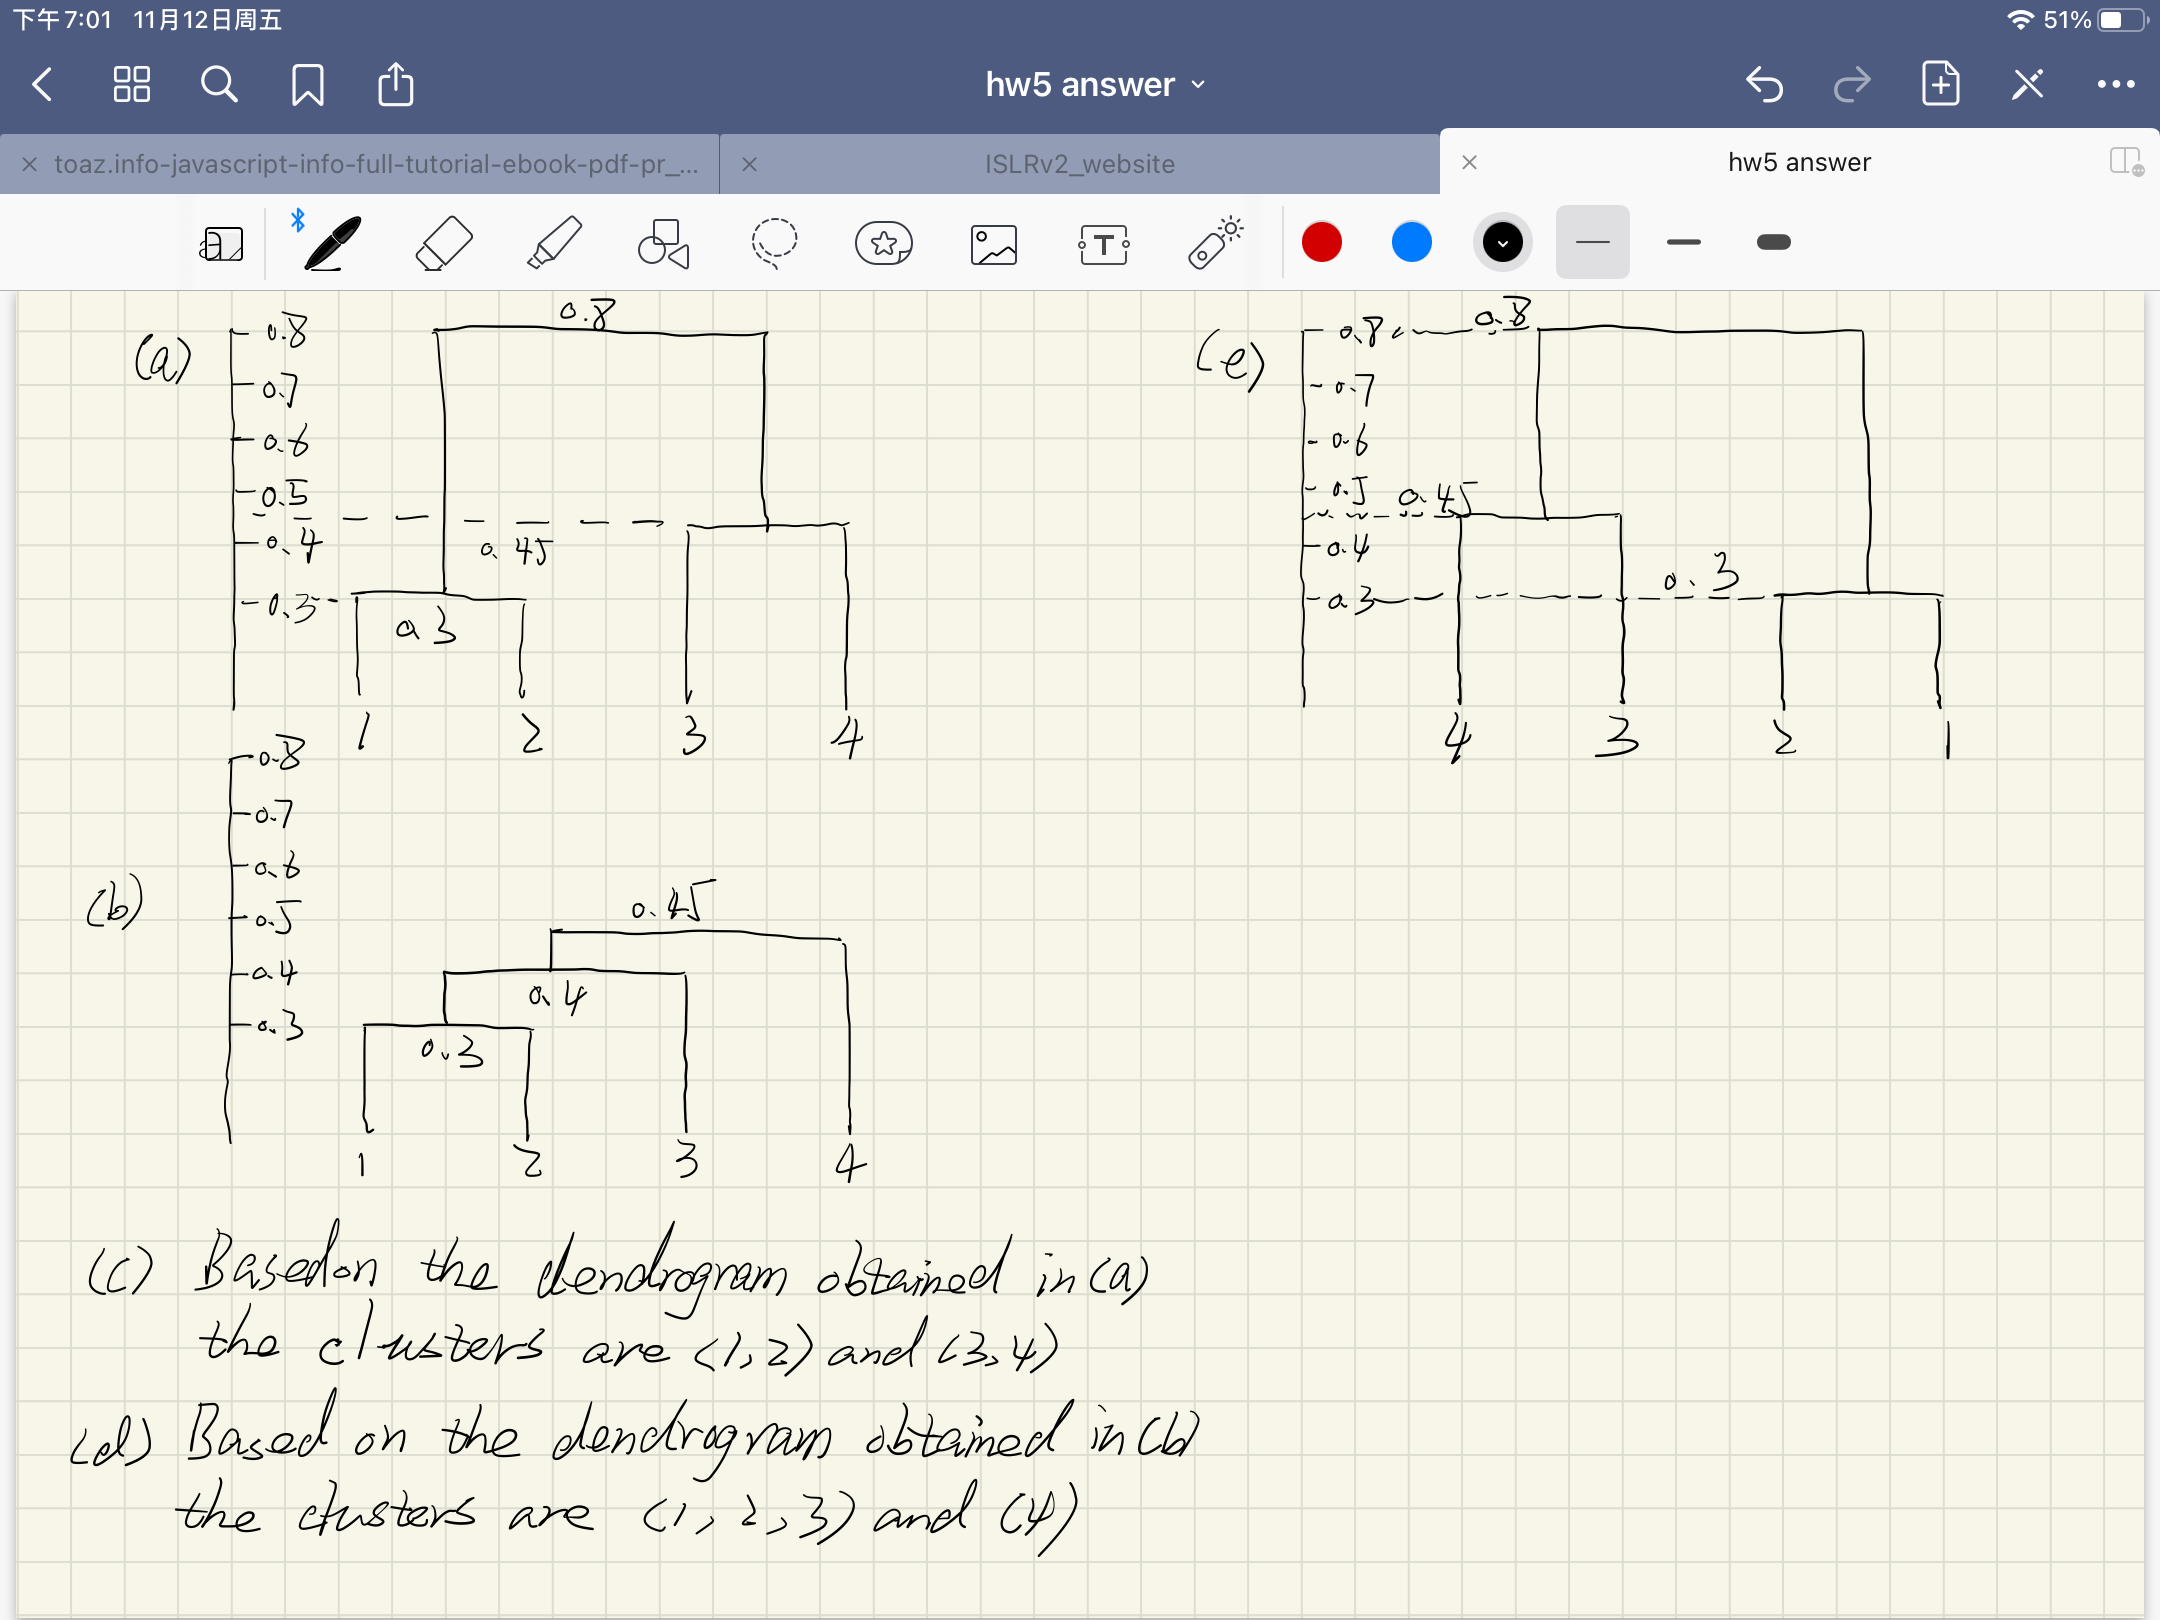